In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

pd.set_option('max_rows', 100)

In [18]:
chineseRaw = pd.read_csv('alipay.csv', encoding='gbk')

In [19]:
chineseRaw.columns = ['transactionId','orderId','createDateTime','paymentDateTime',
                       'latestModificationDateTime','source','type','counterparty',
                       'product','amount(CNY)','in/out','transactionStatus','serviceFee',
                       'refund','remark','financialState','unknown']

In [103]:
chineseRow = chineseRaw[~(chineseRaw['counterparty']
                          .isin(['天弘基金管理有限公司 ','商诚融资担保有限公司 ','梁雨龙'])) &
                        (chineseRaw['transactionStatus']
                         .isin(['交易成功','还款成功','代付成功','支付成功']))]

In [104]:
chineseRow.loc[:,'createDateTime'] = pd.to_datetime(chineseRow['createDateTime'])
chineseRow.loc[:,'paymentDateTime'] = pd.to_datetime(chineseRow['paymentDateTime'])

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [105]:
chineseRow['timeDiff'] = chineseRow['paymentDateTime'] - chineseRow['createDateTime']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
chineseCol = chineseRow.drop(['transactionId','orderId','latestModificationDateTime',
                              'in/out','financialState','remark','unknown','serviceFee',
                              'type','paymentDateTime'], axis=1)

In [107]:
chineseIndex = chineseCol.set_index('createDateTime')
chineseIndex.head()

,source,counterparty,product,amount(CNY),transactionStatus,refund,timeDiff
createDateTime,,,,,,,
2018-03-13 14:26:58,支付宝网站,正阳(刘正阳),Feb Mar Gas + Mar Internet,660.00,交易成功,0.0,00:00:04
2018-02-12 01:28:41,支付宝网站,正阳(刘正阳),rent + internet Feb,3450.40,交易成功,0.0,00:00:07
2018-01-28 14:16:56,支付宝网站,正阳(刘正阳),Gas + Internet,515.00,交易成功,0.0,00:00:11
2018-01-01 10:31:04,淘宝,洛夫特旗舰店,【焕新价】洛夫特 苹果x手机壳女款iphonex挂绳软硅胶套10卡通可爱新款防摔,35.00,交易成功,0.0,00:00:24
2017-12-13 01:57:01,支付宝网站,正阳(刘正阳),Gas + internet,595.66,交易成功,0.0,00:00:16


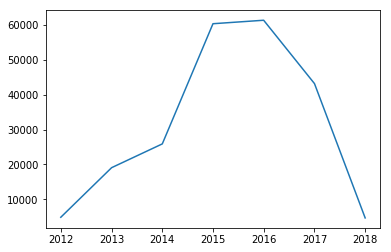

In [129]:
yearSum = chineseIndex.resample('AS')['amount(CNY)'].sum()
plt.plot(yearSum)
plt.show()

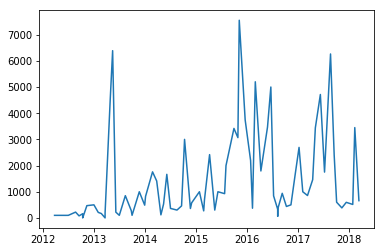

In [109]:
monthMaxIdx = chineseIndex.resample('M')['amount(CNY)'].idxmax()
monthMax = chineseIndex.loc[monthMaxIdx]
plt.plot(monthMax['amount(CNY)'])
plt.show()

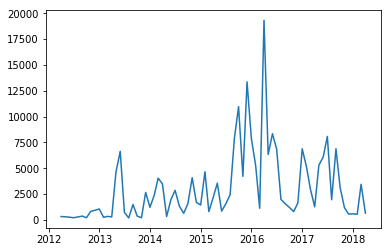

In [126]:
monthSum = chineseIndex.resample('M')['amount(CNY)'].sum()
plt.plot(monthSum)
plt.show()